# Part 1: Exploring the Data

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Import and Examination

First, I'll import the data and quickly examine the columns and their types, as well as understanding what the data looks like.  For any possible data quality issues, I will dive in deeper to the variables which I feel present issues and fix them (if possible).

In [274]:
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")
users = pd.read_csv("USER_TAKEHOME.csv")
transactions = pd.read_csv("TRANSACTION_TAKEHOME.csv")

### Products

First, the products table.

In [275]:
#Note: I like .sample() more than .head() because I can rerun the cell many times and 
#get a basic understanding the nature + oddities of the data with a simple 
#visual examination.

products.sample(5)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
50056,Health & Wellness,Hair Care,Conditioner,NaN,REM MANUFACTURER,REM BRAND,6.695585e+10
713481,Health & Wellness,Bath & Body,Bath Sponges & Loofahs,NaN,PLACEHOLDER MANUFACTURER,VELONA,7.047511e+11
431048,Health & Wellness,Hair Care,Conditioner,NaN,PROCTER & GAMBLE,HERBAL ESSENCES,1.906790e+11
821785,Health & Wellness,First Aid,First Aid Kits,NaN,FJDZ INTERNATIONAL INC,EVRIDWEAR,6.015578e+11
445739,Snacks,Fruit & Vegetable Snacks,Fruit Rolls & Twists,NaN,GENERAL MILLS,FRUIT BY THE FOOT,1.600015e+10


In [276]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [277]:
#Converting the barcode to an object, as the key should not be a float

products["BARCODE"] = products["BARCODE"].astype("Int64").astype(str)
products["BARCODE"] = products["BARCODE"].replace("<NA>", np.NaN) #Preserving NaN is cleaner

In [278]:
#Checking if each barcode in products is unique (it should be as the primary key)

len(products) == products["BARCODE"].nunique()

False

In [279]:
#Checking the amount of duplicate rows

len(products) - len(products.drop_duplicates())

215

In [280]:
#Example of a duplicate row

products[products["BARCODE"] == products["BARCODE"].value_counts().index[0]]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
612573,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,3423905
827242,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,3423905


In [281]:
#Example of a duplicate barcode without an entire duplicate row

products[products["BARCODE"] == products.drop_duplicates()["BARCODE"].value_counts().index[0]]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
216314,Snacks,Candy,Chocolate Candy,NaN,FERRERO GROUP,KINDER,80310167
585634,Snacks,Candy,Chocolate Candy,NaN,KINDER'S,KINDER'S,80310167


The products table suffers the problem of duplicate rows and duplicate primary keys.  I can remove the duplicate rows, but occurences such as those above may require further questions (did the manufacturer name change for Kinders? Which is correct? What is causing the missing barcodes?)

In [282]:
#Filling missing values with the context of the data in mind.

products["MANUFACTURER"].fillna("Unknown", inplace = True)
products["BRAND"].fillna("Unknown", inplace = True)

products["CATEGORY_1"].fillna("No Category", inplace = True)
products["CATEGORY_2"].fillna("No Sub-Category", inplace = True)
products["CATEGORY_3"].fillna("No Sub-Category", inplace = True)
products["CATEGORY_4"].fillna("No Sub-Category", inplace = True)

#Changing column names to make more sense

products_clean = products.rename(columns = {"CATEGORY_1": "CATEGORY", "CATEGORY_2": "SUB-CATEGORY_1", "CATEGORY_3": "SUB-CATEGORY_2", "CATEGORY_4": "SUB-CATEGORY_3"})

In [283]:
#Clean products table with unique barcodes:

products_clean.sample(5)

,CATEGORY,SUB-CATEGORY_1,SUB-CATEGORY_2,SUB-CATEGORY_3,MANUFACTURER,BRAND,BARCODE
730818,Health & Wellness,First Aid,First Aid Kits,No Sub-Category,ACME UNITED CORPORATION,FIRST AID ONLY,92265905688
73182,Health & Wellness,Hair Care,Shampoo & Conditioner Combinations,No Sub-Category,PROCTER & GAMBLE,HEAD & SHOULDERS,37000731887
650405,Snacks,Cookies,No Sub-Category,No Sub-Category,MONDELĒZ INTERNATIONAL,CHIPS AHOY!,720996285129
166996,Health & Wellness,Bath & Body,Bar Soap,No Sub-Category,Unknown,Unknown,850034502168
628831,Health & Wellness,Bath & Body,Liquid Hand Soap,No Sub-Category,Unknown,Unknown,43834338857


In [284]:
#Clean products table with unique barcodes:

products_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CATEGORY        845552 non-null  object
 1   SUB-CATEGORY_1  845552 non-null  object
 2   SUB-CATEGORY_2  845552 non-null  object
 3   SUB-CATEGORY_3  845552 non-null  object
 4   MANUFACTURER    845552 non-null  object
 5   BRAND           845552 non-null  object
 6   BARCODE         841527 non-null  object
dtypes: object(7)
memory usage: 45.2+ MB


### Users

Next, the users table.

In [285]:
users.sample(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
12102,631de5bd198485e890021699,2022-09-11 13:42:21.000 Z,2001-09-11 04:00:00.000 Z,MI,en,male
19253,66ae4c3a465f309038b61398,2024-08-03 15:26:50.000 Z,1986-03-15 00:00:00.000 Z,AL,en,female
86843,66b97e9386cc41b000d84d12,2024-08-12 03:16:35.000 Z,1979-02-16 08:00:00.000 Z,WA,en,male
36033,5e1dbbb8c4614f12895780c7,2020-01-14 13:01:44.000 Z,1964-07-04 00:00:00.000 Z,NC,en,female
44119,5f45b0c5f8607915c02c4dab,2020-08-26 00:45:57.000 Z,1981-11-29 06:00:00.000 Z,WI,en,male


In [286]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [287]:
#Converting date/time variables to datetime objects

users["CREATED_DATE"] = pd.to_datetime(users["CREATED_DATE"])
users["BIRTH_DATE"] = pd.to_datetime(users["BIRTH_DATE"])

In [288]:
#Checking if each id in users is unique (it should be as the primary key)

len(users) == users["ID"].nunique()

True

Despite some missing values, the users table appears quite high-quality as all IDs are unique, implying no duplicates.

In [289]:
#Filling missing values with the context of the data in mind.  The datetime objects will not be filled so they can preserve their data types (NaT)

users["STATE"].fillna("Unknown", inplace = True)
users["LANGUAGE"].fillna("Unknown", inplace = True)
users["GENDER"].fillna("Unknown", inplace = True)

In [290]:
#Clean users table:

users.sample(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
2712,629d5aa4d9666655703419d6,2022-06-06 01:38:44+00:00,1958-06-06 00:00:00+00:00,CA,es-419,female
42043,5dcb29dcbeba2b1315032af3,2019-11-12 21:53:32+00:00,1980-11-11 05:00:00+00:00,VA,Unknown,female
41275,63fc55c538f010745ba1e1d0,2023-02-27 07:03:33+00:00,1983-03-26 08:00:00+00:00,CA,en,male
49386,64d8fff4c606ac082997d7ac,2023-08-13 16:08:20+00:00,1989-04-22 00:00:00+00:00,CA,en,female
57606,5fc28c7294c4b94b967e31f8,2020-11-28 17:44:18+00:00,1974-11-21 00:00:00+00:00,TX,Unknown,male


In [291]:
#Clean users table:

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         100000 non-null  object             
 4   LANGUAGE      100000 non-null  object             
 5   GENDER        100000 non-null  object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


### Transactions

Last, the transactions table.

In [292]:
transactions.sample(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
48666,b083256a-2e9a-4dbb-aa0d-701fdbb92f16,2024-08-13,2024-08-13 16:14:36.788 Z,WALMART,5df81f7696284f11dc2d0e99,8.900000e+11,1.00,7.84
24930,ff3e29f2-5057-4191-b7c2-e3e66e5aece1,2024-08-30,2024-08-30 14:26:56.733 Z,BJ'S WHOLESALE CLUB,62abe1ff165645ea96fe6ca3,8.660001e+10,1.00,
29155,f891c690-dda5-41c6-9744-ffc534e14c6e,2024-08-20,2024-08-23 14:00:49.097 Z,WALGREENS,63e18360b425eb11a476104f,3.008107e+11,1.00,6.79
16946,ad3cc64b-2b62-4fed-ab6c-edc2b205ce6c,2024-08-25,2024-08-28 16:53:04.362 Z,SAFEWAY,60500905d9d5e812b1ee2f09,1.159410e+10,1.00,
20288,d0314894-e27c-4674-ad57-201cc84895b1,2024-07-13,2024-07-13 13:22:05.257 Z,WALMART,63a4abe9747a17c3519b3682,2.970000e+10,1.00,


In [293]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [294]:
#Converting the barcode to an object

transactions["BARCODE"] = transactions["BARCODE"].astype("Int64").astype(str)
transactions["BARCODE"] = transactions["BARCODE"].replace("<NA>", np.NaN)

#Converting date/time variables to datetime objects

transactions["PURCHASE_DATE"] = pd.to_datetime(transactions["PURCHASE_DATE"])
transactions["SCAN_DATE"] = pd.to_datetime(transactions["SCAN_DATE"])

In [295]:
#Checking if each receipt id is unique

len(transactions) == transactions["RECEIPT_ID"].nunique()

False

In [296]:
#Examining the receipt which occurs most often in the data.  There is only 1 unique barcode
#within this data which confuses me as the final quantity variable should reflect this number
#of rows (This receipt has 12 entries for the same receipt/barcode.  I believe there should be
#only one entry but the value of FINAL_QUANTITY should be 12 or 9 if I ignore the "zero" entries)

transactions[transactions["RECEIPT_ID"] == transactions["RECEIPT_ID"].value_counts().index[0]]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
18637,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,zero,0.89
18638,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,1.00,
18639,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,zero,0.89
18640,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,1.00,
18641,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,zero,0.89
18642,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,1.00,
39703,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,1.00,0.89
39704,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,1.00,0.89
39705,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,1.00,0.89
39706,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348000+00:00,KROGER,614f7e8081627974a57c8a9e,11110121141,1.00,0.89


In [297]:
#Number of occurences that each unique number of barcodes exists by receipt id.  

transactions.groupby("RECEIPT_ID")["BARCODE"].nunique().value_counts()

1    21310
0     2801
2      318
3       11
Name: BARCODE, dtype: int64

In [298]:
#"zero" values are a confusing occurence as are the values which are reported as floats for a quantity

transactions["FINAL_QUANTITY"].value_counts()

1.00    35698
zero    12500
2.00     1285
3.00      184
4.00      139
        ...  
6.22        1
1.22        1
1.23        1
2.57        1
2.27        1
Name: FINAL_QUANTITY, Length: 87, dtype: int64

In [299]:
#Understanding why FINAL_SALE is an object like FINAL_QUANTITY instead of a float

transactions["FINAL_SALE"].value_counts()

         12500
1.25      1323
1.00       744
2.99       588
1.99       586
         ...  
16.47        1
10.92        1
61.30        1
13.14        1
42.38        1
Name: FINAL_SALE, Length: 1435, dtype: int64

In [300]:
#Getting the empty space value

transactions["FINAL_SALE"].value_counts().index[0]

' '

In [301]:
#Fixing the data types of FINAL_QUANTITY and FINAL_SALE.  I wouldn't feel comfortable changing the floats to integers as
#I first need to understand why this happening.  I also don't want to assume that the " " values for FINAL_SALE are 0, 
#so I'll make them missing values so I can still report them as floats.

transactions["FINAL_QUANTITY"] = transactions["FINAL_QUANTITY"].replace("zero", "0").astype(float)
transactions["FINAL_SALE"] = transactions["FINAL_SALE"].replace(" ", np.NaN).astype(float)

In [302]:
#Clean(er) transactions table:

transactions.sample(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
9061,5d4f4229-c761-417b-b016-16e0b2ec4131,2024-09-02,2024-09-02 20:40:00.982000+00:00,WALMART,5e6358b9917f99575f689dea,78742051642,0.0,3.94
17454,b286e0a8-3ae1-4972-be95-b2d5192b23a8,2024-09-07,2024-09-08 10:09:22.593000+00:00,VONS,5ee2f85e120c6f13fd47bfae,16291441903,1.0,NaN
15826,a167c346-f326-49be-a79c-a5aa9b8bbcdc,2024-07-13,2024-07-13 13:28:22.072000+00:00,DOLLAR TREE STORES INC,5dd6938884bdce11da058c26,26200471594,1.0,NaN
15683,a0157a2d-8aec-4424-b92a-41a6a92128fd,2024-07-27,2024-07-27 23:00:45.561000+00:00,WALMART,60f707a38db49c7ab8e283eb,28400596688,0.0,3.98
24567,fb8cd4ad-5853-4dcb-8da3-e7f3f48bec55,2024-06-14,2024-06-25 12:40:37.085000+00:00,ALDI,63954b4790ad5449ec623210,NaN,0.0,1.95


In [303]:
#Clean(er) transactions table:

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  object             
 4   USER_ID         50000 non-null  object             
 5   BARCODE         44238 non-null  object             
 6   FINAL_QUANTITY  50000 non-null  float64            
 7   FINAL_SALE      37500 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(4)
memory usage: 3.1+ MB


I wouldn't feel comfortable performing additional cleaning on this data (ie. removing the duplicates) without making sure I'm understanding the structure correctly (same with the duplicates in products).

## EDA

In this section, I will perform sample univariate and bivariate analysis to understand the structure of the data.  I'll focus more on the variables that are needed for the questions in part 2.

### Products

In [255]:
top_cats = products_clean["CATEGORY"].value_counts().head(10)

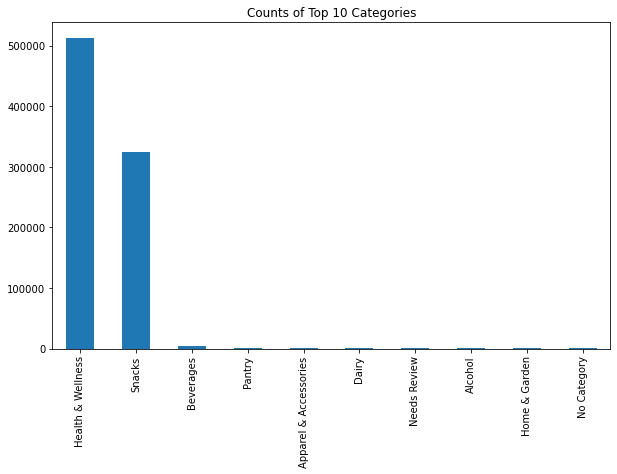

In [256]:
#Univariate analysis of categories

plt.figure(figsize=(10, 6))
top_cats.plot(kind = "bar")
plt.title("Counts of Top 10 Categories")
plt.show()

There are two major categories.

In [257]:
#Aggregating the data to get the top 5 sub-categories by major category to yield a clean visualization

top_2_cat = products_clean[products_clean["CATEGORY"].isin(["Health & Wellness", "Snacks"])]
df_counts = top_2_cat.groupby(['CATEGORY', 'SUB-CATEGORY_1']).size().reset_index(name='count')
df_top5 = df_counts.groupby('CATEGORY').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

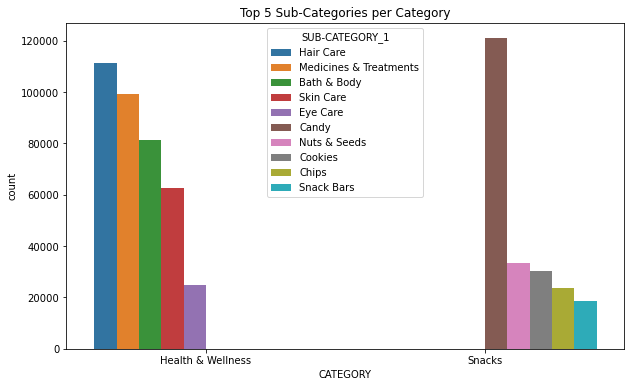

In [258]:
#Bivariate analysis of sub-category 1 by the major categories

plt.figure(figsize=(10, 6))
sns.barplot(data = df_top5, x='CATEGORY', y='count', hue='SUB-CATEGORY_1', dodge=True)
plt.title("Top 5 Sub-Categories per Category")
plt.legend(title="SUB-CATEGORY_1", loc = "upper center")
plt.show()

Candy dominates the snacks category.

### Users

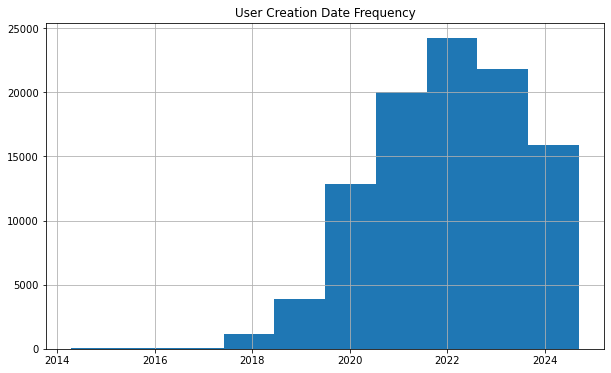

In [259]:
#Univariate analysis of user creation

plt.figure(figsize=(10, 6))
users["CREATED_DATE"].hist()
plt.title("User Creation Date Frequency")
plt.show()

New users seemed to peak in 2022.

In [260]:
#Getting user age given the birth date

users['BIRTH_DATE'] = users['BIRTH_DATE'].fillna(pd.Timestamp(datetime.now().date()))
users['AGE'] = users['BIRTH_DATE'].apply(lambda x: (datetime.now().date() - x.date()).days // 365)
users["AGE"] = users["AGE"].replace(0, np.NaN)

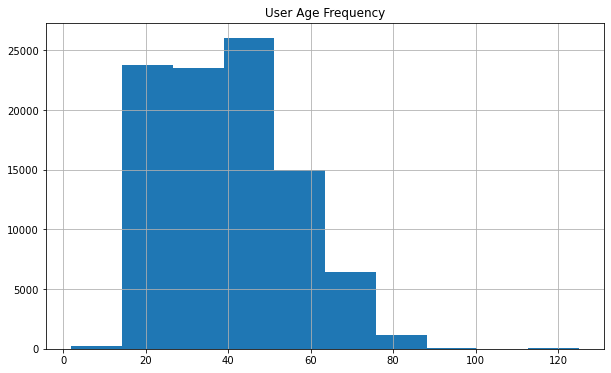

In [261]:
#Univariate Analysis of user age

plt.figure(figsize=(10, 6))
users["AGE"].hist()
plt.title("User Age Frequency")
plt.show()

In [262]:
users["AGE"].mean(), users["AGE"].median()

(39.957622631715545, 39.0)

The age of users follows a slightly right-skewed with an average of 40 years old., as very few users are under 18 years old.  Many generations will be represented for closed question 3 in part 2.

In [263]:
#Univariate analysis of gender

users["GENDER"].value_counts()

female                    64240
male                      25829
Unknown                    5892
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: GENDER, dtype: int64

In [264]:
#Bivariate analysis of user age and gender

users.groupby("GENDER").mean()["AGE"]

GENDER
My gender isn't listed    31.400000
Non-Binary                30.500000
Prefer not to say         42.000000
Unknown                   49.140550
female                    41.202390
male                      36.720470
non_binary                29.600423
not_listed                32.677778
not_specified             35.785714
prefer_not_to_say         36.227745
transgender               37.419865
unknown                   33.841837
Name: AGE, dtype: float64

Female users tend to be older than male users.

### Transactions

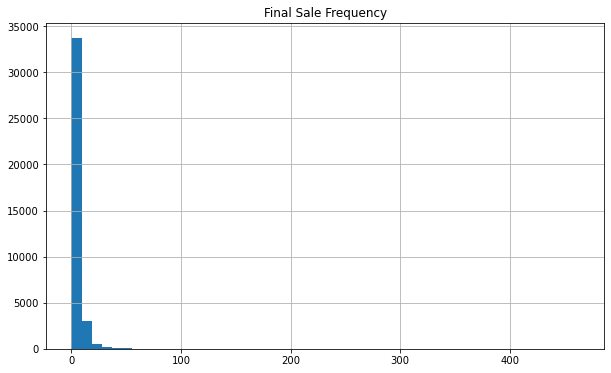

In [265]:
#Univariate analysis of final sale

plt.figure(figsize=(10, 6))
transactions["FINAL_SALE"].hist(bins = 50)
plt.title("Final Sale Frequency")
plt.show()

In [266]:
transactions["FINAL_SALE"].mean(), transactions["FINAL_SALE"].median()

(4.576384000000174, 3.0)

The final sale variable is very right skewed and the average is strangely small for the context of the data.

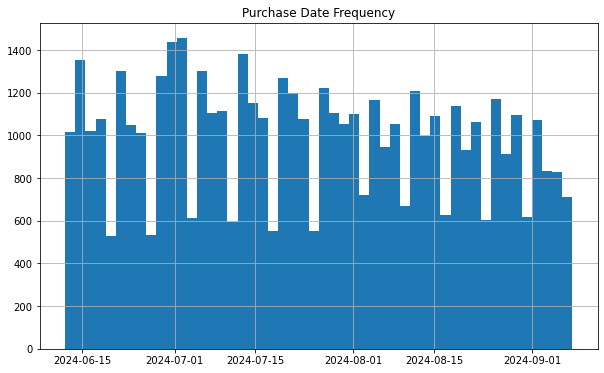

In [267]:
#Univariate analysis of purchase date

plt.figure(figsize=(10, 6))
transactions["PURCHASE_DATE"].hist(bins = 50)
plt.title("Purchase Date Frequency")
plt.show()

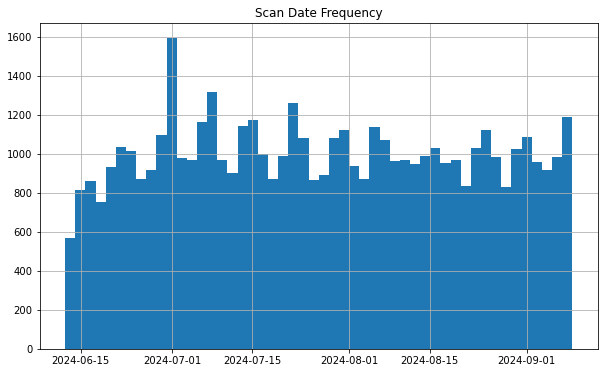

In [268]:
#Univariate analysis of scan date

plt.figure(figsize=(10, 6))
transactions["SCAN_DATE"].hist(bins = 50)
plt.title("Scan Date Frequency")
plt.show()

The transaction data only covers 2024 (which makes sense considering the data seems to be a sample of exactly 50k rows).  There are strange oscillations in the data which may be worth exploring (weekends?).